In [52]:
import cv2
import numpy as np
import numpy.typing as npt
from pathlib import Path
from skimage import color as skcolor
import matplotlib.pyplot as plt

In [53]:
def normalize_img(
    img: npt.NDArray[np.float64], rimg: npt.NDArray[np.float64]
) -> npt.NDArray[np.float64]:
    """normalize an image according to a reference image"""
    norm_img: npt.NDArray[np.float64] = np.zeros_like(img, dtype=np.float64)
    for c in range(3):
        norm_img[:, :, c] = np.divide(img[:, :, c], rimg[:, :, c])
        norm_img[:, :, c] = np.nan_to_num(norm_img[:, :, c], nan=0)

    norm_img = np.clip(norm_img, 0, 1)
    return norm_img

In [54]:
def CilToCart(arr):
    
    z = arr[:,0]
    rho = arr[:,1]
    phi = arr[:,2]
    x = rho * np.cos( phi )
    y = rho * np.sin( phi )
    arr[:,1] = x
    arr[:,2] = y
    return arr   

/tmp/ipykernel_21519/263479497.py:7: RuntimeWarning: invalid value encountered in divide
  norm_img[:, :, c] = np.divide(img[:, :, c], rimg[:, :, c])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


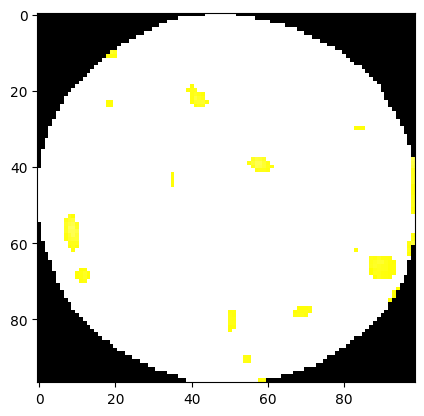

In [55]:
# Directorio fuente
src_dir = './img'
folder = Path(src_dir)

# Archivos
files = folder.glob('*_ref.png')

for i in list(files):
    
    image_path = str(i).replace('_ref', "")
    
    # Leer la imagen
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    rimg = cv2.cvtColor(cv2.imread(str(i)), cv2.COLOR_BGR2RGB)
    
    # Normalizacion
    norm_img = normalize_img(img, rimg)
    
    # rgbtolab
    lab_image = skcolor.rgb2lab(norm_img)
    lch_image = skcolor.lab2lch(lab_image)
    
    plt.imshow(lch_image)
    
    # Change of coordinates
     # Cambio de coordenadas
    lch_image_cartesian = CilToCart(lch_image.copy().reshape(-1, 3)).reshape(lch_image.shape)
    
    labch_image = np.stack((lab_image[:,:,0], lab_image[:,:,1], lab_image[:,:,2], lch_image[:,:,1], lch_image[:,:,2]), axis=-1)
    
    # Guardar la imagen LABCH como un archivo .npy
    output_path = str(i).replace('_ref.png', '_LABCH.npy')
    np.save(output_path, labch_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


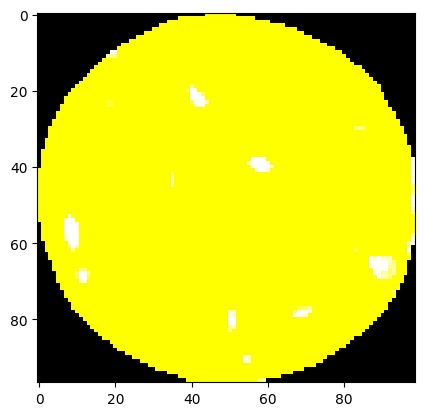

In [56]:
plt.imshow(lch_image_cartesian)